In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import warnings 
# warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv('Dhaka Rent.csv' , sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [159]:
df.isnull().sum()   #koita null value ace count kore

area    0
rent    0
dtype: int64

In [160]:
df.shape

(60, 2)

In [161]:
df[['area']].head() #df.area/df['area']  note: df[['area']](2D eta) is a dataframe,   df['area'](1D) series,df.area series

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [162]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [163]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [164]:
df.corr() #corelation (akta variable er sathe arekta variable er relation)

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Text(0, 0.5, 'RENT')

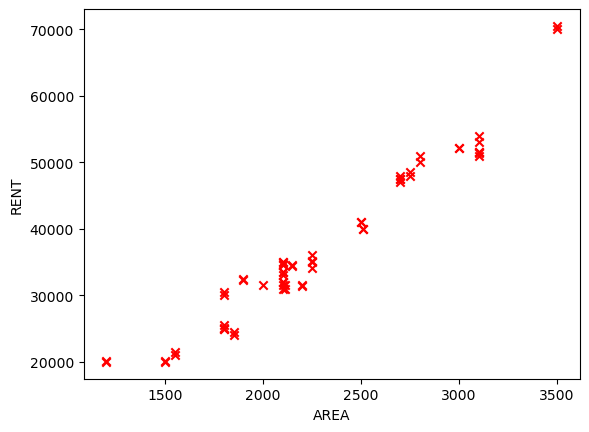

In [165]:
plt.scatter(df.area,df.rent, marker = 'x' , color='red')
plt.xlabel("AREA")
plt.ylabel("RENT")

In [166]:
df.area.mean()

2289.0

In [167]:
df.rent.mean()

37269.166666666664

In [168]:
x = df.drop('rent' , axis=1)
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [169]:
y = df.drop('area' , axis = 1)
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
reg = LinearRegression()  #object create kora hoice

In [172]:
reg.fit(x,y)

LinearRegression()

In [173]:
reg.coef_

array([[21.29266147]])

In [174]:
reg.intercept_

array([-11469.73544643])

In [175]:
reg.predict([[2000]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31115.58750079]])

In [176]:
df['residuals'] = df[['rent']] - reg.predict(x) #residuals = predict - original
df.head()

,area,rent,residuals
0,2000,31500,384.412499
1,2100,35000,1755.146352
2,2500,41050,-711.918238
3,2250,36100,-338.752869
4,3000,52100,-308.248974


In [177]:
df['predict'] = reg.predict(x)
df.head()

,area,rent,residuals,predict
0,2000,31500,384.412499,31115.587501
1,2100,35000,1755.146352,33244.853648
2,2500,41050,-711.918238,41761.918238
3,2250,36100,-338.752869,36438.752869
4,3000,52100,-308.248974,52408.248974


Text(0, 0.5, 'RENT')

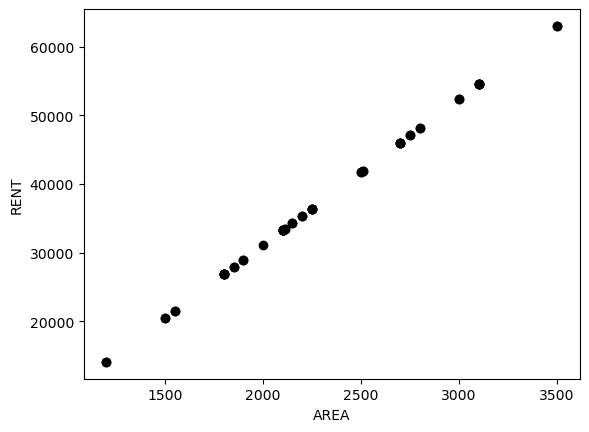

In [178]:
plt.scatter(df.area , df.predict, marker='o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

Text(0, 0.5, 'RENT')

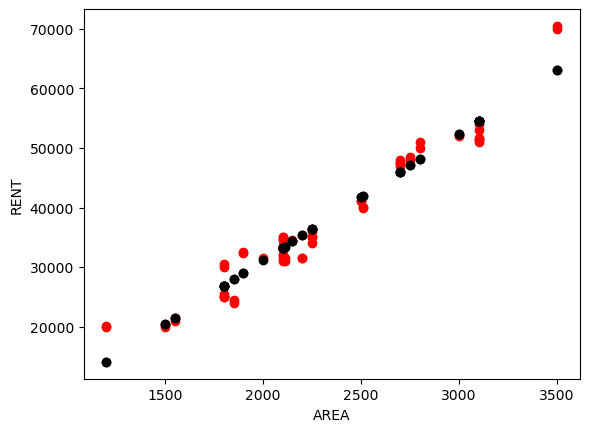

In [179]:
plt.scatter(df.area , df.rent, marker='o', color='red')
plt.scatter(df.area , df.predict, marker='o', color='black')
plt.xlabel('AREA')
plt.ylabel('RENT')

Text(0, 0.5, 'RENT')

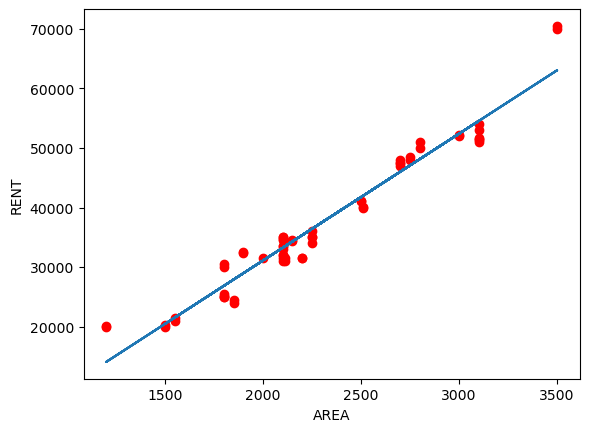

In [180]:
plt.scatter(df.area , df.rent, marker='o', color='red')
plt.plot(df.area, df.predict)
plt.xlabel('AREA')
plt.ylabel('RENT')

MSE

In [181]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [182]:
mse = mean_squared_error(df['rent'] , df['predict'])
mse

6778077.204095561

In [183]:
mean_absolute_error(df['rent'] , df['predict'])

2009.8695093576282

In [184]:
import math 
math.sqrt(mse) #RMSE

2603.474064417689

Accuracy

In [185]:
reg.score(x,y)

0.950249380357677

Train Test Split

In [186]:
from sklearn.model_selection import train_test_split as tts

In [187]:
xtrain,  xtest, ytrain, ytest = tts(x, y)

In [188]:
len(xtrain)

45

In [189]:
len(xtest)

15

In [190]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = .30,random_state=20)

In [191]:
len(xtrain)

42

In [192]:
len(xtest)

18

In [193]:
xtrain.head()

,area
52,3500
59,3100
30,2100
27,1800
0,2000


In [194]:
ytrain.head()

,rent
52,70500
59,51600
30,33500
27,25000
0,31500


In [195]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [196]:
reg.score(xtest,ytest)

0.9207672803808087

In [197]:
reg.score(xtrain,ytrain)

0.9550683429317284

Train Test Validation

In [198]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = .40,random_state=20)

In [199]:
xtrain.shape

(36, 1)

In [200]:
xtest.shape

(24, 1)

In [201]:
xtrain, xval, ytrain, yval = tts(xtest, ytest, test_size = .50, random_state=20)

In [202]:
xtrain.shape

(12, 1)

In [203]:
xval.shape

(12, 1)